# Test Notebook for TAFT
## Time alignment for tiles 

In [1]:
%cd ..

/home/maximilian/Github/melp


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from melp import Detector
import melp.taft

Welcome to JupyROOT 6.24/06


In [4]:
from scipy.optimize import curve_fit

## Creating/Loading detector with misalignment

In [5]:
mu3e_detector = Detector.initFromROOT("./run42_20000.root")
#mu3e_detector = Detector.initFromSave("cal_cosmic_best.det")
#mu3e_detector = Detector.initFromSave("calibration_iteration3_v1.det")

------------------------------
Detector information

Stats:
  - Tiles:  5824
    -> misal:  True
  - Pixel Modules:  2844
  - Loaded Runs (Tiles):  []
  - Loaded Runs (Pixel):  []
------------------------------


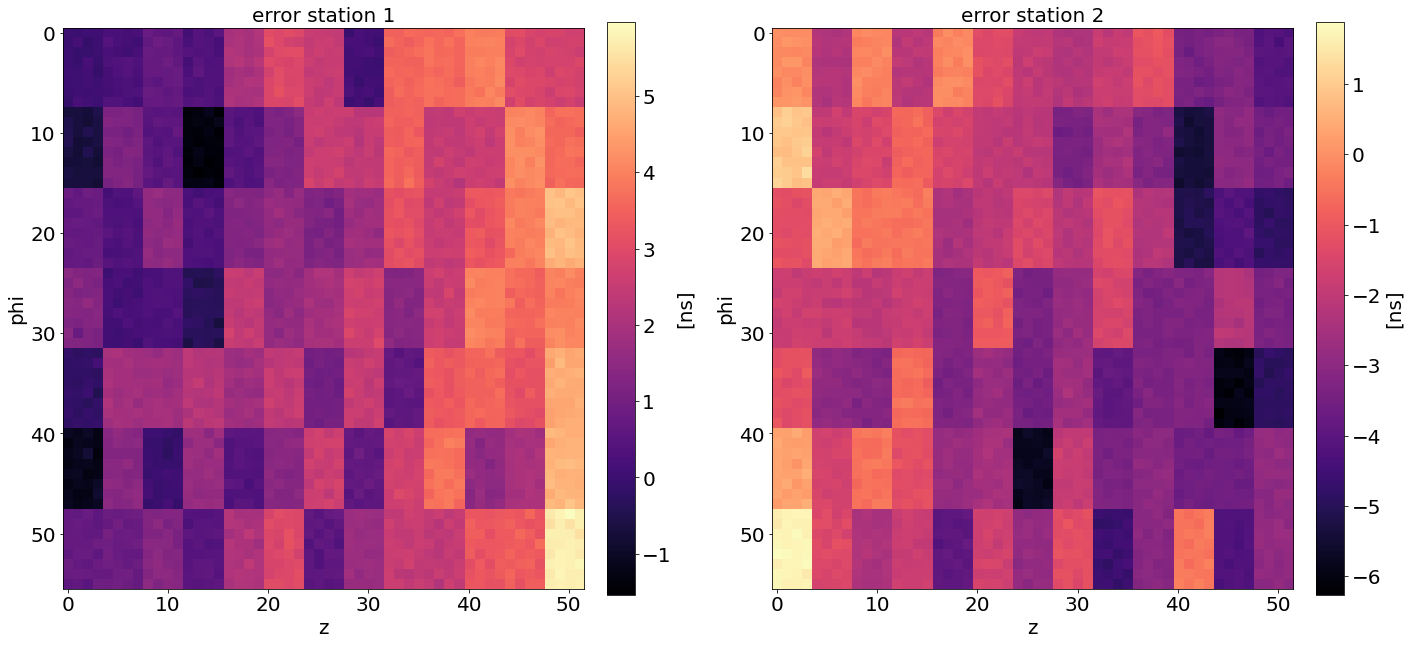

Station 1: max error:  5.97195  min error:  -1.53416
Station 2: max error:  1.88402  min error:  -6.25887


In [6]:
melp.taft.plot_calibration(mu3e_detector)

In [7]:
melp.taft.select(mu3e_detector)

In [8]:
options={
    "ttree_loc": "alignment/mu3e", # "alignment/mu3e",
    "mc_primary": True,
    "mode": "test tof",
    "offset_mode": "constant", # constant / norm
    "offset": 20
}
# /run/media/maximilian/Volume/Cosmics_Dev
# /home/maximilian/SSD
#hist = melp.taft.station_station_timing('/home/maximilian/mu3e_sorted_000334.root', mu3e_detector, **options)
#hist = melp.taft.station_station_timing('/run/media/maximilian/Volume/Cosmics_Dev/merged_11_17.root', mu3e_detector, **options)
timings = melp.taft.station_station_timing('/run/media/maximilian/Volume/mu3e_sorted_000002_cosmic.root', mu3e_detector, **options)
#timings = melp.taft.station_station_timing('/home/maximilian/SSD/mu3e_sorted_000002_cosmic.root', mu3e_detector, **options)

/home/maximilian/Github/melp/melp/taft/utils/cosmic.py:105: UserWarning: INEFFICIENT
  warnings.warn("INEFFICIENT")


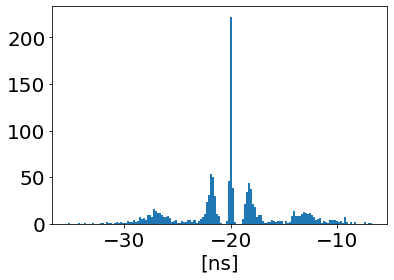

In [14]:
plt.hist(timings, bins=150)#, range=(-20.75,-19.25))#, range=(-10.5,-9.5))
plt.xlabel("[ns]")
plt.show()

## get mean and remove unusable data

In [17]:
def gauss(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def getStationOffset(timings: list):
    mean = np.mean(timings)
    median = np.median(timings)
    range_around_mean = (mean - 0.5, mean + 0.5)
    print("mean: ", np.round(mean,4), " | median: ", np.round(median,4))
    
    hist_1 = plt.hist(timings, bins=150, range=range_around_mean)
    #plt.show()

    bin_centers=np.asarray(((hist_1[1][:-1] + hist_1[1][1:]) / 2))
    
    coeff, var_matrix = curve_fit(gauss, bin_centers, hist_1[0], p0=[mean,1,1])
    plt.plot(bin_centers,gauss(bin_centers, coeff[0], coeff[1], coeff[2]), color="red")
    plt.xlabel("[ns]")
    plt.show()
    
    error = coeff[1]/np.sqrt(sum(hist_1[0]))
    print("Station offset: ", np.round(coeff[0], 4), " ± ", np.round(error, 4))
    print("Usable events: ", sum(hist_1[0]))
    
    return coeff[0], error

mean:  -19.9924  | median:  -20.0022


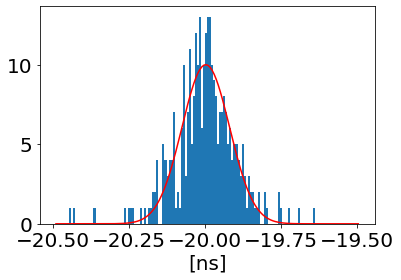

Station offset:  -19.9968  ±  0.0044
Usable events:  311.0


In [18]:
_ = getStationOffset(timings)

In [12]:
print(mu3e_detector.TileDetector.tile[200000].pos[2]-mu3e_detector.TileDetector.tile[302856].pos[2])
print(mu3e_detector.TileDetector.tile[202856].pos[2]-mu3e_detector.TileDetector.tile[300000].pos[2])

-1133.83
-476.4100000000001
